<a href="https://colab.research.google.com/github/Spinachboul/Feynn-Labs-report/blob/main/Electric_Vehicle_EDA_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [3]:
# Printing the dataset head
print(df.head())
# Check the datatypes of any column and if there are any missing values
print(df.info())
# Summary statistics of the numeric columns
print(df.describe())
# Summary statistics of categorical columns
print(df.describe(include = "object"))

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJ3E1EB4L     Yakima     Yakima    WA      98908.0        2020  TESLA   
1  5YJ3E1EA7K  San Diego  San Diego    CA      92101.0        2019  TESLA   
2  7JRBR0FL9M       Lane     Eugene    OR      97404.0        2021  VOLVO   
3  5YJXCBE21K     Yakima     Yakima    WA      98908.0        2019  TESLA   
4  5UXKT0C5XH  Snohomish    Bothell    WA      98021.0        2017    BMW   

     Model                   Electric Vehicle Type  \
0  MODEL 3          Battery Electric Vehicle (BEV)   
1  MODEL 3          Battery Electric Vehicle (BEV)   
2      S60  Plug-in Hybrid Electric Vehicle (PHEV)   
3  MODEL X          Battery Electric Vehicle (BEV)   
4       X5  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible           322.0   
1           Clean Alternative Fuel Vehicle Eligible           220.0   

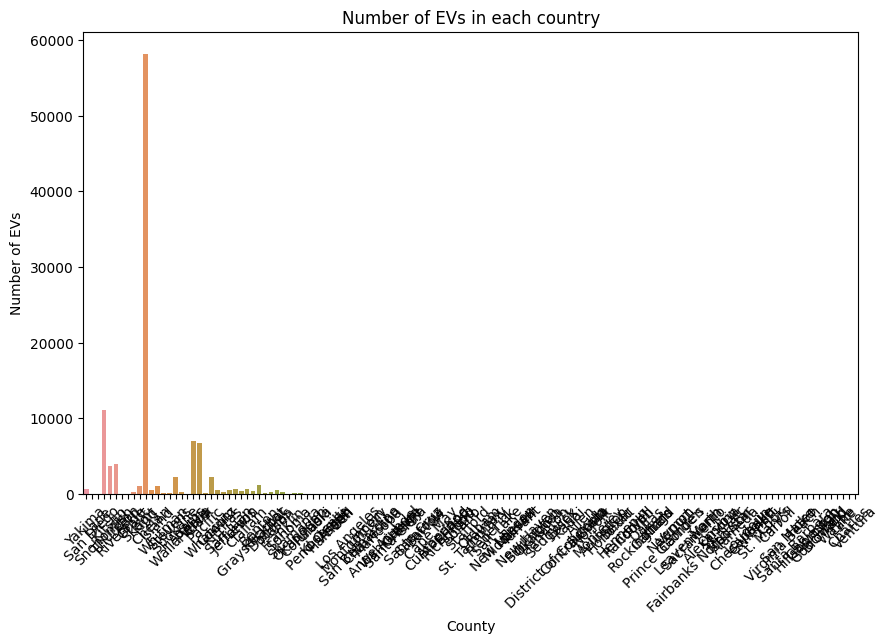

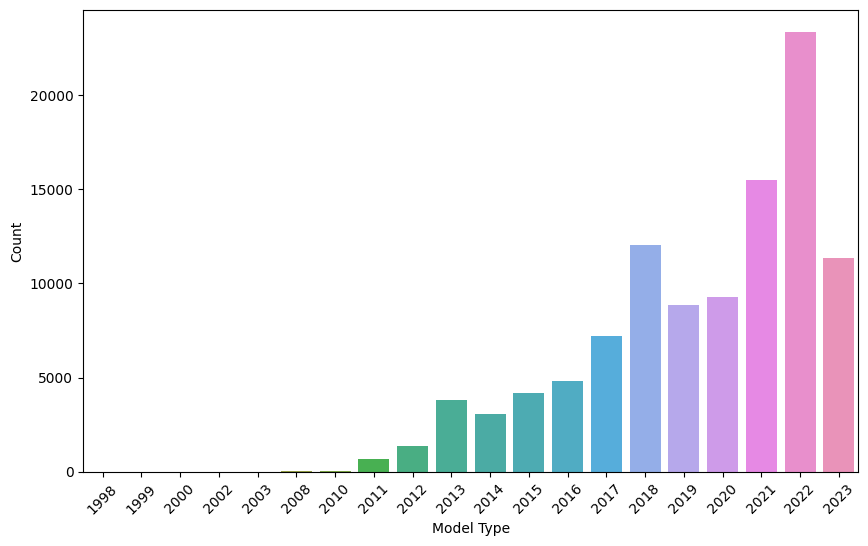

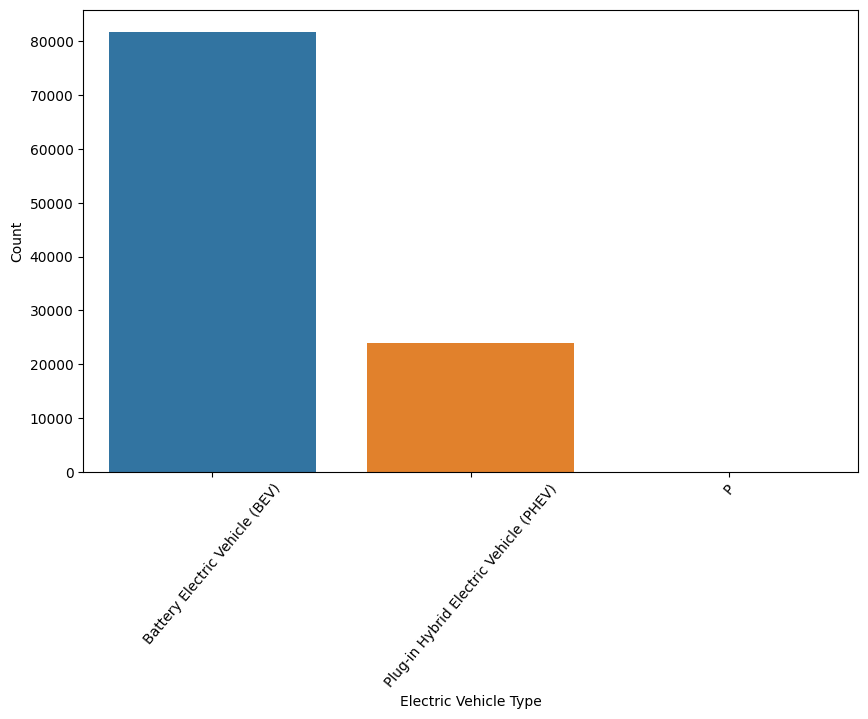

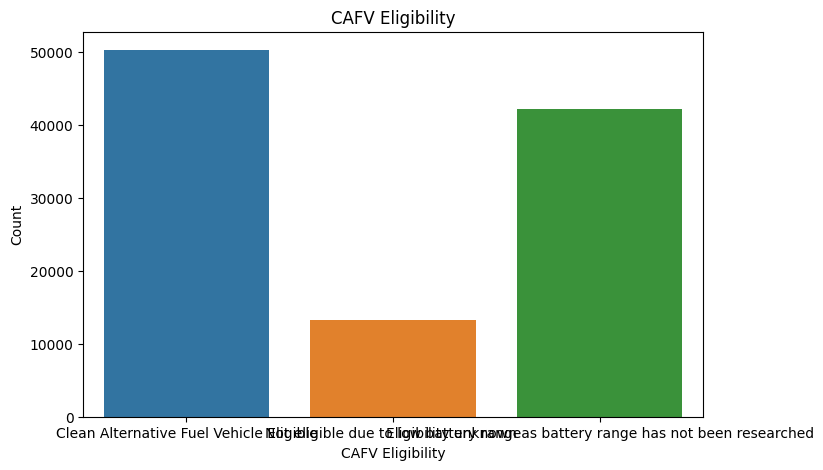

In [13]:
# Count plot for county
plt.figure(figsize=(10,6))
sns.countplot(x = "County",data=df)
plt.title("Number of EVs in each country")
plt.xlabel("County")
plt.ylabel("Number of EVs")
plt.xticks(rotation = 45)
plt.show()

# Count plot for model year
plt.figure(figsize = (10,6))
sns.countplot(x = "Model Year", data=df)
plt.xlabel("Model Type")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

# Count for electric vehicle type
plt.figure(figsize = (10,6))
sns.countplot(x = "Electric Vehicle Type", data = df)
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation = 50)
plt.show()

# Count plot for 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
plt.figure(figsize=(8, 5))
sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=df)
plt.title('CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.show()

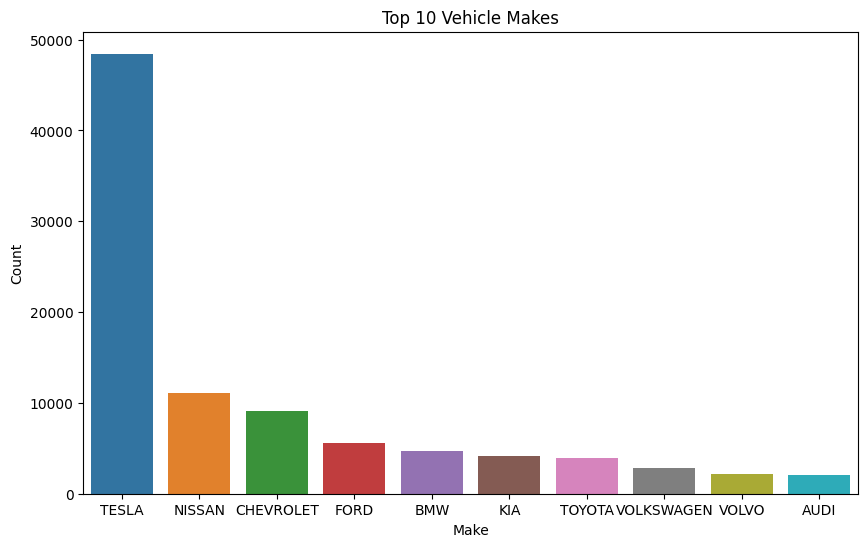

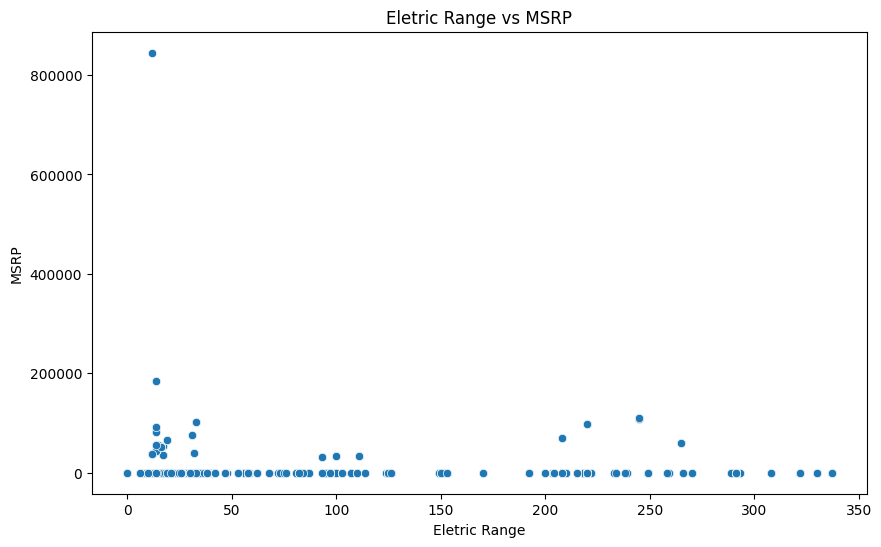

In [14]:
# Bar plot for top 10 vehicle makes
top_10_makes = df['Make'].value_counts().nlargest(10)
plt.figure(figsize = (10,6))
sns.barplot(x=top_10_makes.index, y=top_10_makes.values)
plt.title("Top 10 Vehicle Makes")
plt.xlabel("Make")
plt.ylabel("Count")
plt.show()


# Scatter plot for "ELectric Range" vs "Base MSRP"
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Electric Range', y = 'Base MSRP', data  =df)
plt.title("Eletric Range vs MSRP")
plt.xlabel("Eletric Range")
plt.ylabel("MSRP")
plt.show()

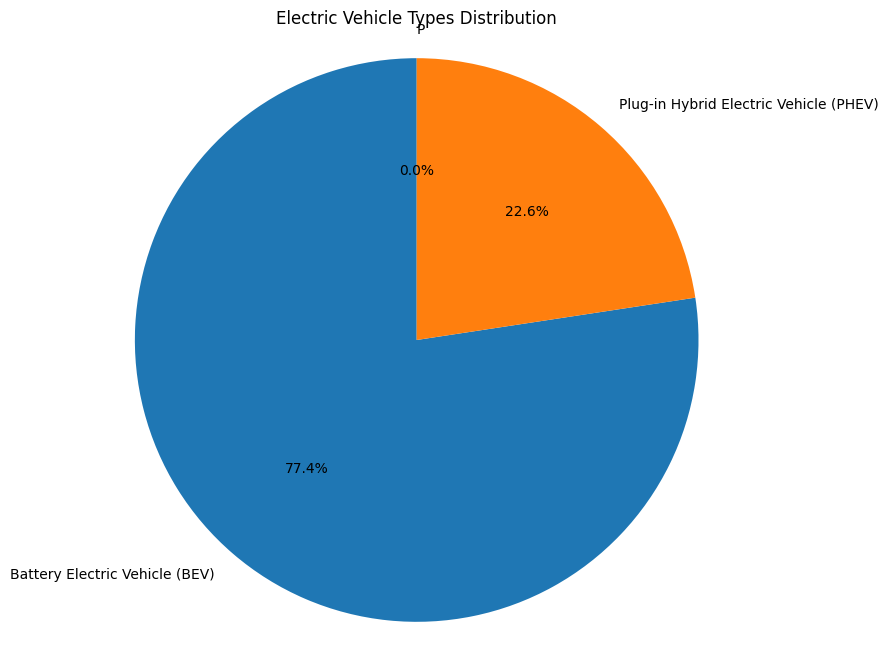

In [15]:
# Pie chart for 'Electric Vehicle Type'
plt.figure(figsize=(8, 8))
ev_type_counts = df['Electric Vehicle Type'].value_counts()
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Electric Vehicle Types Distribution')
plt.axis('equal')
plt.show()

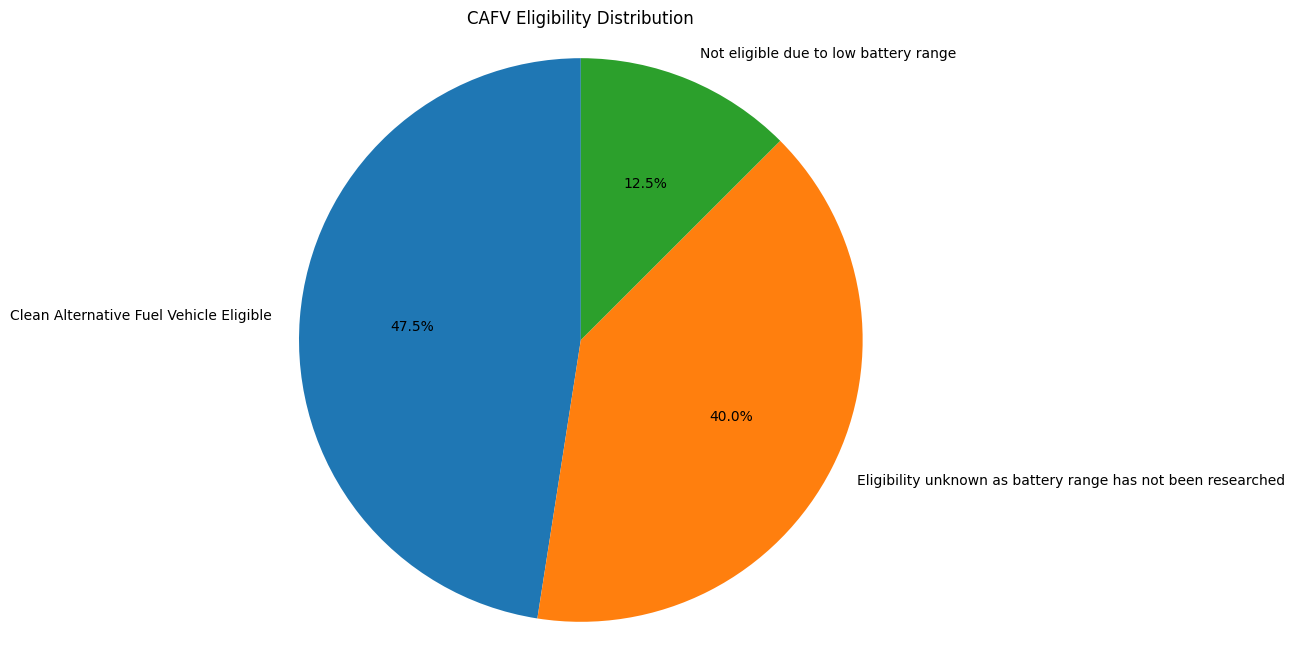

In [16]:
# Pie chart for 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
plt.figure(figsize=(8, 8))
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.pie(cafv_counts, labels=cafv_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('CAFV Eligibility Distribution')
plt.axis('equal')
plt.show()

In [19]:
import plotly.express as px
# Interactive scatter plot using Plotly
fig = px.scatter(df, x='Electric Range', y='Base MSRP', color='Electric Vehicle Type', hover_name='Make')
fig.update_layout(title='Interactive Scatter Plot: Electric Range vs. Base MSRP',
                  xaxis_title='Electric Range',
                  yaxis_title='Base MSRP')
fig.show()

In [20]:
!pip install altair

In [ ]:
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
scatter_plot = alt.Chart(df).mark_circle().encode(
    x='Electric Range',
    y='Base MSRP',
    color='Electric Vehicle Type',
    tooltip=['Make', 'Electric Range', 'Base MSRP']
).interactive()

scatter_plot.title = 'Interactive Scatter Plot: Electric Range vs. Base MSRP'

# Show the plot
scatter_plot.show()
